In [13]:
import numpy as np
import pandas as pd
import seaborn as sns

import numpy as np
import pandas as pd
import seaborn as sns

# Read in the files
balance_sheet = pd.read_excel("../data/Balance_Sheet.xlsx")
income_statement = pd.read_excel("../data/financials.xlsx")

['Year', 'Cost Of Revenue', 'Discontinued Operations', 'Ebit', 'Effect Of Accounting Charges', 'Extraordinary Items', 'Gross Profit', 'Income Before Tax', 'Income Tax Expense', 'Interest Expense', 'Minority Interest_x', 'Net Income', 'Net Income Applicable To Common Shares', 'Net Income From Continuing Ops', 'Non Recurring', 'Operating Income', 'Other Items', 'Other Operating Expenses', 'Research Development', 'Selling General Administrative', 'Total Operating Expenses', 'Total Other Income Expense Net', 'Total Revenue', 'comp_type', 'company', 'Accounts Payable', 'Cash', 'Common Stock', 'Gains Losses Not Affecting Retained Earnings', 'Inventory', 'Long Term Debt', 'Long Term Investments', 'Net Receivables', 'Net Tangible Assets', 'Other Assets', 'Other Current Assets', 'Other Current Liab', 'Other Liab', 'Other Stockholder Equity', 'Property Plant Equipment', 'Retained Earnings', 'Short Long Term Debt', 'Short Term Investments', 'Total Assets', 'Total Current Assets', 'Total Current L

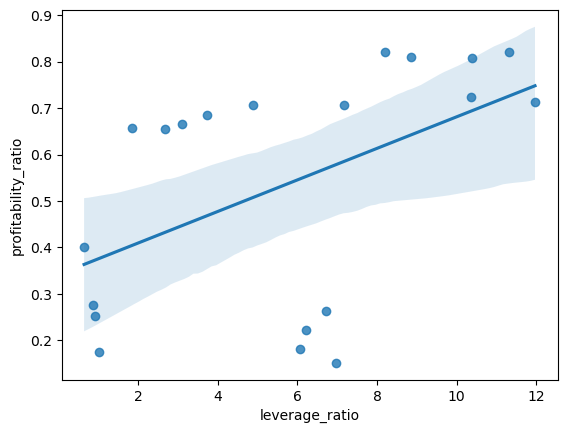

In [21]:
# Merge both the dataframes and call it df_ratios
df_ratios = pd.merge(income_statement, balance_sheet, on = ["Year", "company", "comp_type"])

# First, let's check the actual column names to find the correct one for "Cost Of Goods Sold"
print(df_ratios.columns.tolist())  # Uncomment this to see all columns

# After checking the columns, use the correct column name for "Cost of Revenue"
# Assuming the correct column name might be something like "Cost Of Goods Sold" or "COGS"
# Replace "Cost of Revenue" with the actual column name from your dataframe
df_ratios["profitability_ratio"] = (df_ratios["Total Revenue"] - df_ratios["Cost Of Revenue"])/df_ratios["Total Revenue"]  # Changed column name

# Compute operating margin ratio, but commenting it out
# df_ratios["profitability_ratio"] = (df_ratios["Total Revenue"] - df_ratios["Total Operating Expenses"])/df_ratios["Total Revenue"]

# You only need to compute one leverage ratio, but we are providing the code to compute both the debt-to-equity ratio and the equity multiplier ratio 

# Compute debt-to-equity ratio
df_ratios["leverage_ratio"] = df_ratios["Total Liab"]/df_ratios["Total Stockholder Equity"]

# Compute equity multiplier ratio, but commenting it out
# df_ratios["leverage_ratio"] = df_ratios["Total Assets"]/df_ratios["Total Stockholder Equity"]

# Using pivot table to see the "comp_type" with the lowest average profitability ratio
print(df_ratios.pivot_table(index="comp_type", values="profitability_ratio"))
lowest_profitability = "fmcg"

# Using pivot table to see the "comp_type" with the highest average leverage ratio
print(df_ratios.pivot_table(index="comp_type", values="leverage_ratio"))
highest_leverage = "real_est"

# Plot the leverage ratio on x-axis and profitability on y axis to see if real estate companies with higher leverage ratio have  higher profitability
df_real_est = df_ratios.loc[df_ratios["comp_type"]=="real_est"]
plot = sns.regplot(data=df_real_est, x="leverage_ratio", y="profitability_ratio")
relationship = "positive"